# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Parkinson's disease (PD) Project
    
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Description

* This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). 
* Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording.

|                                                     Attribute                                                    |                             Description                             |
|:----------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------:|
|                                                       name                                                       |               ASCII subject name and recording number               |
|                                                    MDVP:Fo(Hz)                                                   |                 Average vocal fundamental frequency                 |
|                                                   MDVP:Fhi(Hz)                                                   |                 Maximum vocal fundamental frequency                 |
|                                                   MDVP:Flo(Hz)                                                   |                 Minimum vocal fundamental frequency                 |
|            MDVP:Jitter(%)<br /> MDVP:Jitter(Abs)<br /> MDVP:RAP<br /> MDVP:PPQ<br /> Jitter:DDP<br />            |        Several measures of variation in fundamental frequency       |
| MDVP:Shimmer<br /> MDVP:Shimmer(dB)<br /> Shimmer:APQ3<br /> Shimmer:APQ5<br /> MDVP:APQ<br /> Shimmer:DDA<br /> |              Several measures of variation in amplitude             |
|                                                   NHR<br /> HNR                                                  | Two measures of ratio of noise to tonal components in the voice     |
|                                                      status                                                      | Health status of the subject  (one) - Parkinson's  (zero) - healthy |
|                                                   RPDE<br /> D2                                                  |             Two nonlinear dynamical complexity measures             |
|                                                        DFA                                                       |                   Signal fractal scaling exponent                   |
|                                          spread1<br /> spread2<br /> PPE                                         |     Three nonlinear measures of fundamental frequency variation     |


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Objective
* Goal is to classify the patients into the respective labels using the attributes from their voice recordings

## <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 1. Load the dataset

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 1.1 Import necessary libraries

In [69]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

from scipy import stats
from scipy.stats import zscore, skew

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from mlxtend.classifier import StackingCVClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 1.2 Notebook setup

In [2]:
# Notebook settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid")

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 1.3 Read data

In [3]:
# Import the dataset named 'Data - Parkinsons'
data  = pd.read_csv('./Data - Parkinsons') 

## <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 2.1 View the first 10 rows of the data

In [4]:
#View the first 10 rows of the data
pd.set_option('display.max_columns', None)
data.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   
5           0.00008   0.00463   0.00750     0.01388       0.04701   
6           0.00003   0.00155   0.00202     0.00466       0.01608   
7           0.00003   0.00144   0.00182     0.00431       0.01567   
8           0.00006   0.00293   0.00332     0.00880       0.02093   
9           0.00006   0.00268   0.00332     0.00803       0.02838   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   
5             0.456       0.02328       0.03526   0.03243      0.06985   
6             0.140       0.00779       0.00937   0.01351      0.02337   
7             0.134       0.00829       0.00946   0.01256      0.02487   
8             0.191       0.01073       0.01277   0.01717      0.03218   
9             0.255       0.01441       0.01725   0.02444      0.04324   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   
5  0.01222  21.378       1  0.415564  0.825069 -4.242867  0.299111  2.187560   
6  0.00607  24.886       1  0.596040  0.764112 -5.634322  0.257682  1.854785   
7  0.00344  26.892       1  0.637420  0.763262 -6.167603  0.183721  2.064693   
8  0.01070  21.812       1  0.615551  0.773587 -5.498678  0.327769  2.322511   
9  0.01022  21.862       1  0.547037  0.798463 -5.011879  0.325996  2.432792   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335  
5  0.357775  
6  0.211756  
7  0.163755  
8  0.231571  
9  0.271362

#### Observation: 
<ol>
<li><span style="color:#228B22"> The data looks clean / garbage free
<li><span style="color:#228B22"> Each patient has six records and the attributes varies in each record
<li><span style="color:#228B22"> The first column combines both patient id and record id. This can be dropped during processing
<li><span style="color:#228B22"> All columns except for the 'name' and target column are numerical. There are no categorical attributes    
<li><span style="color:#228B22"> The limited number of datasets poses a challenge considering the number of attributes present. 
<li><span style="color:#228B22"> However some of the attributes appear to be redundant, mutually dependent and similar to each other 

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 2.2 Check the shape of the data

In [5]:
# Check the shape of the data
data.shape

(195, 24)

#### Observation:
<ol>
<li><span style="color:#228B22"> There are 195 Observations / Rows and 24 Attributes / Columns.

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 2.3 Check the data for duplicates

In [6]:
data.name.nunique()

195

#### Observation:  
<ol>
<li><span style="color:#228B22"> All the entries are unique, there are no duplicate or repeating patient records.

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 2.4 Check the Information about the data and the datatypes of each respective attributes

In [7]:
# Check the Information about the data and the datatypes of each respective attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### Observation:  <span style="color:#228B22"> 
<ol>
     <li><span style="color:#228B22">The data has 195 rows and 24 columns with 1 object 22 float and 1 integer data type 
     <li><span style="color:#228B22">All the variables have 195 Non-null entries

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 2.5 Dealing with missing values

In [8]:
# Check for missing values and dropping if any
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data # return the dataframe
missing_check(data)

Total  Percent
PPE                   0      0.0
D2                    0      0.0
MDVP:Fo(Hz)           0      0.0
MDVP:Fhi(Hz)          0      0.0
MDVP:Flo(Hz)          0      0.0
MDVP:Jitter(%)        0      0.0
MDVP:Jitter(Abs)      0      0.0
MDVP:RAP              0      0.0
MDVP:PPQ              0      0.0
Jitter:DDP            0      0.0
MDVP:Shimmer          0      0.0
MDVP:Shimmer(dB)      0      0.0
Shimmer:APQ3          0      0.0
Shimmer:APQ5          0      0.0
MDVP:APQ              0      0.0
Shimmer:DDA           0      0.0
NHR                   0      0.0
HNR                   0      0.0
status                0      0.0
RPDE                  0      0.0
DFA                   0      0.0
spread1               0      0.0
spread2               0      0.0
name                  0      0.0

In [10]:
# dropping missing vlaues
# data.dropna(inplace=True) 

#### Observation:  
<ol>
    <li><span style="color:#228B22"> There isn't any standard or non-standard missing vlaues observed in the data.
    <li><span style="color:#228B22"> Hence, nothing is dropped
    

In [11]:
# Identify duplicates records in the data
dupes = data.duplicated()
sum(dupes)

0

In [12]:
# Removing Duplicates
# data = data.drop_duplicates()

## <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations (15 points)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 3.1 Five number summary of the data along with median and IQR

In [13]:
# 5 number summary of the data with median and IQR
pd.set_option('display.max_columns', None)
median = data.median().rename('median')
IQR = (data.quantile(q=0.75)-data.quantile(q=0.25)).rename('IQR')
pd.concat([data.describe().T, median, IQR], axis=1)

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max      median        IQR  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  148.790000  65.197000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  175.829000  89.343000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  104.315000  55.727500  
MDVP:Jitter(%)      0.004940    0.007365    0.033160    0.004940   0.003905  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260    0.000030   0.000040  
MDVP:RAP            0.002500    0.003835    0.021440    0.002500   0.002175  
MDVP:PPQ            0.002690    0.003955    0.019580    0.002690   0.002095  
Jitter:DDP          0.007490    0.011505    0.064330    0.007490   0.006520  
MDVP:Shimmer        0.022970    0.037885    0.119080    0.022970   0.021380  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000    0.221000   0.201500  
Shimmer:APQ3        0.012790    0.020265    0.056470    0.012790   0.012020  
Shimmer:APQ5        0.013470    0.022380    0.079400    0.013470   0.012800  
MDVP:APQ            0.018260    0.029400    0.137780    0.018260   0.016320  
Shimmer:DDA         0.038360    0.060795    0.169420    0.038360   0.036060  
NHR                 0.011660    0.025640    0.314820    0.011660   0.019715  
HNR                22.085000   25.075500   33.047000   22.085000   5.877500  
status              1.000000    1.000000    1.000000    1.000000   0.000000  
RPDE                0.495954    0.587562    0.685151    0.495954   0.166256  
DFA                 0.722254    0.761881    0.825288    0.722254   0.087124  
spread1            -5.720868   -5.046192   -2.434031   -5.720868   1.403904  
spread2             0.218885    0.279234    0.450493    0.218885   0.104883  
D2                  2.361532    2.636456    3.671155    2.361532   0.537330  
PPE                 0.194052    0.252980    0.527367    0.194052   0.115529

#### Observation: 
<ol>
<li><span style="color:#228B22"> All values appears to be in resonable range
<li><span style="color:#228B22"> The multiple MDVP columns look redundant

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 3.2 Checking the distribution of numerical columns

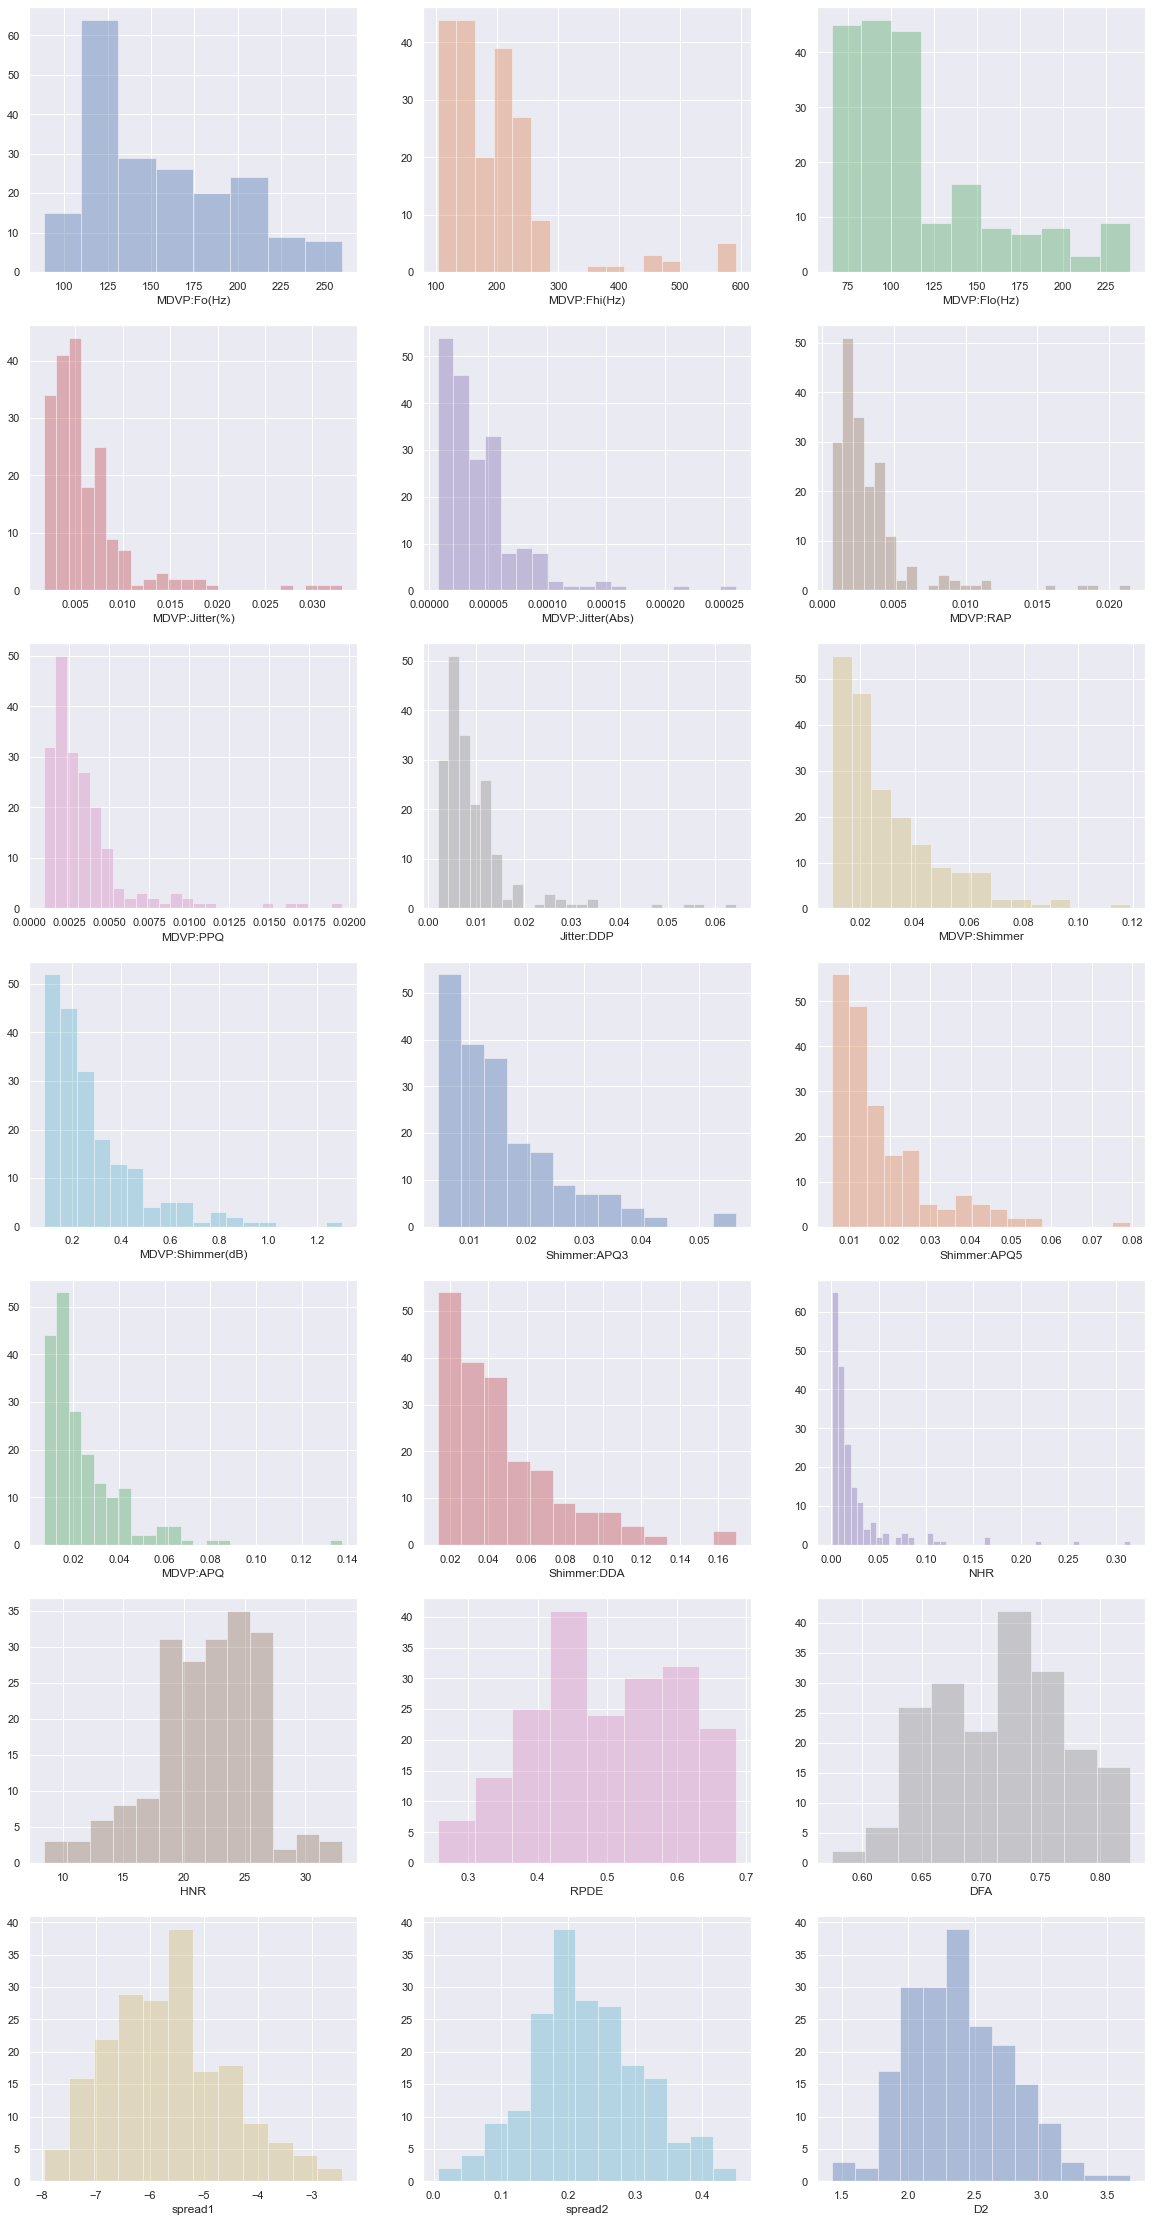

In [15]:
# Find the distribution of numerical columns using histogram
fig, axs = plt.subplots(7,3, figsize=(20,40))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
numerical_vars = data.columns.drop('name').drop('status')
numerical_vars = iter(numerical_vars)
for i in range(21):
    sns.distplot(data[next(numerical_vars)], color=next(colors)["color"], ax=axs[i], kde=False);

#### Observation: 
<ol>
<li><span style="color:#228B22"> The columns : 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR' are all heavily left skewed
<li><span style="color:#228B22"> 'HNR' is slightly right skewed. 


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 3.3 Checking the skewness and Kurtosis of data

In [16]:
# Check the skewness and kurtosis
pd.concat([data.skew().rename('skeweness'), data.kurtosis().rename('kurtosis')], axis=1)

skeweness   kurtosis
MDVP:Fo(Hz)        0.591737  -0.627898
MDVP:Fhi(Hz)       2.542146   7.627241
MDVP:Flo(Hz)       1.217350   0.654615
MDVP:Jitter(%)     3.084946  12.030939
MDVP:Jitter(Abs)   2.649071  10.869043
MDVP:RAP           3.360708  14.213798
MDVP:PPQ           3.073892  11.963922
Jitter:DDP         3.362058  14.224762
MDVP:Shimmer       1.666480   3.238308
MDVP:Shimmer(dB)   1.999389   5.128193
Shimmer:APQ3       1.580576   2.720152
Shimmer:APQ5       1.798697   3.874210
MDVP:APQ           2.618047  11.163288
Shimmer:DDA        1.580618   2.720661
NHR                4.220709  21.994974
HNR               -0.514317   0.616036
status            -1.187727  -0.595518
RPDE              -0.143402  -0.921781
DFA               -0.033214  -0.686152
spread1            0.432139  -0.050199
spread2            0.144430  -0.083023
D2                 0.430384   0.220334
PPE                0.797491   0.528335

#### Observation: 
<ol>
<li><span style="color:#228B22"> The matrix confirms the previous observation, and reveals the columns 'MDVP:Fo(Hz)' and 'PPE' are also moderaltely left skewed


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 3.4 Visualizing the kde more clearly with a vertical mirror image of distribution using the violin plot

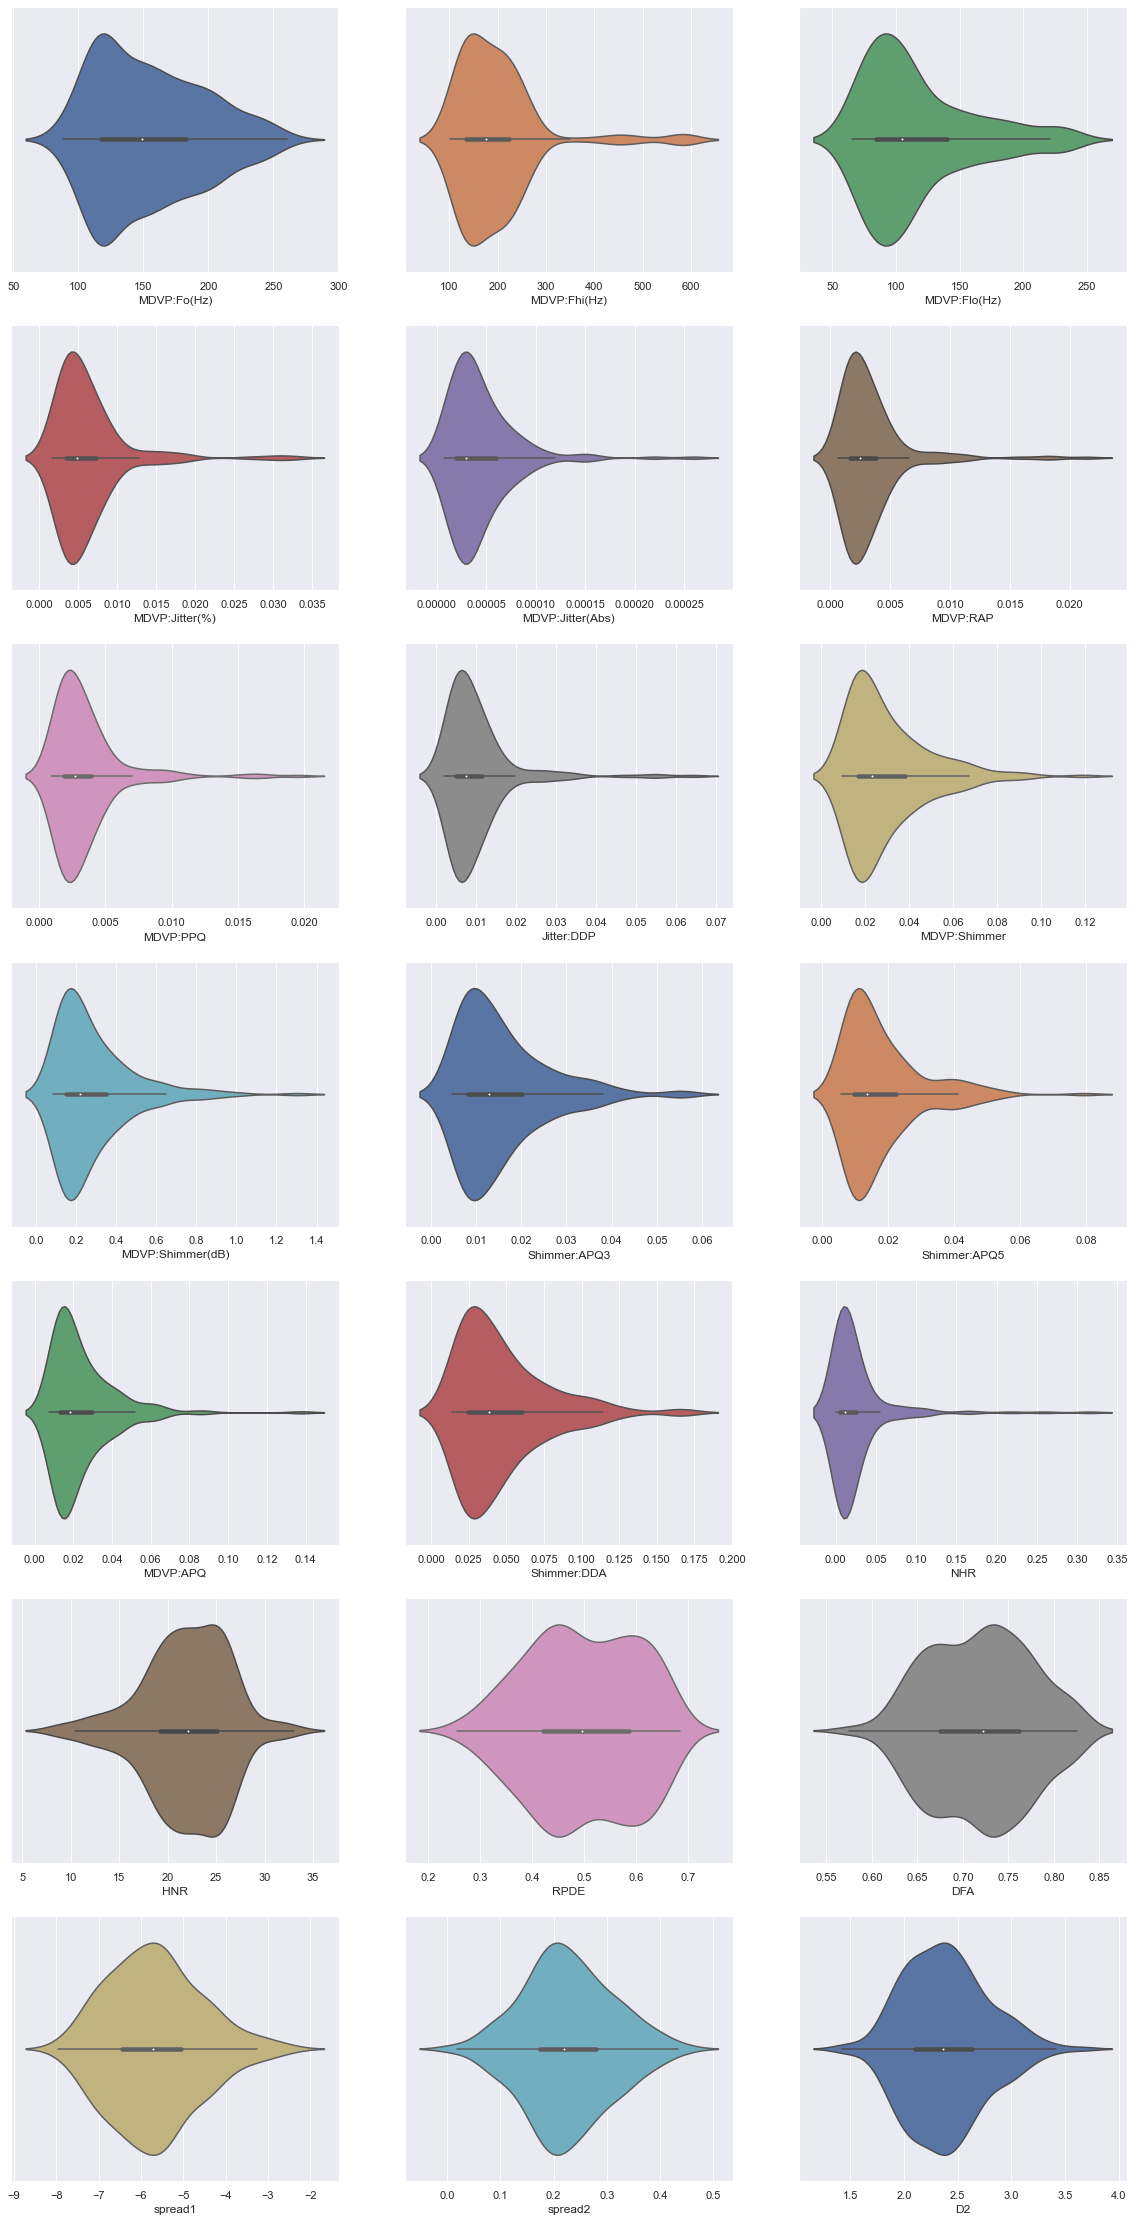

In [17]:
# Visualizing the kde more clearly with a vertical mirror image of distribution using the violin plot
fig, axs = plt.subplots(7,3, figsize=(20,40))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
numerical_vars = data.columns.drop('name').drop('status')
numerical_vars = iter(numerical_vars)
for i in range(21):
    sns.violinplot(data[next(numerical_vars)], color=next(colors)["color"], ax=axs[i], kde=False);

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 3.5 Checking the presence of outliers

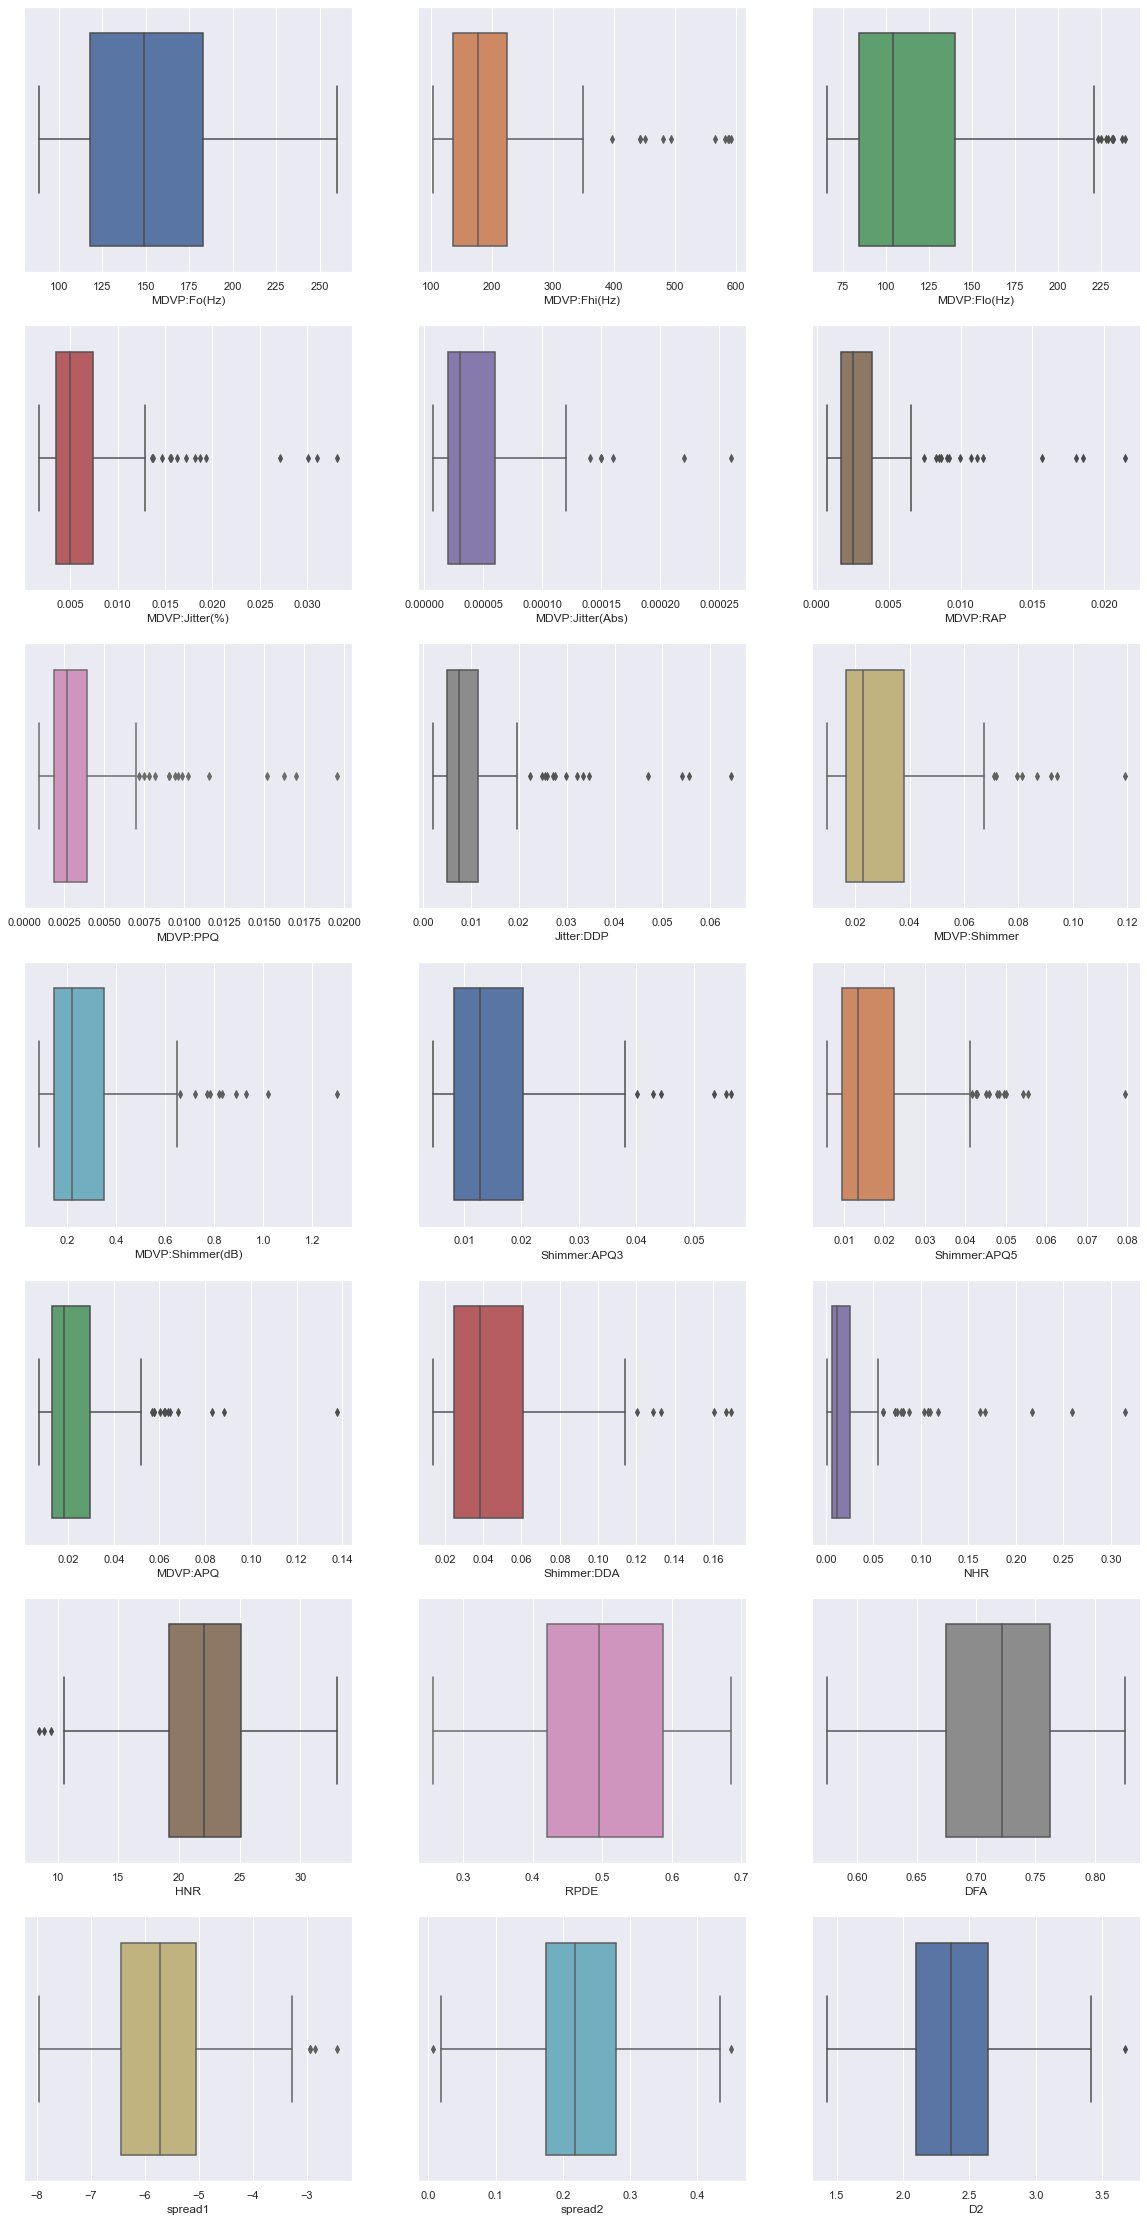

In [18]:
# Checking the presense of Outliers
fig, axs = plt.subplots(7,3, figsize=(20,40))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
numerical_vars = data.columns.drop('name').drop('status')
numerical_vars = iter(numerical_vars)
for i in range(21):
    sns.boxplot(data[next(numerical_vars)], color=next(colors)["color"], ax=axs[i]);

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 3.6 Defining outliers and filtering them

In [ ]:
#Discover outliers with statistical rule (with zscore)
numerical_vars = data.columns.drop('name').drop('status')
z = np.abs(stats.zscore(data[numerical_vars]))
threshold = 3
np.where(z > threshold)

In [29]:
data_filtered_zscore = data[numerical_vars].copy()
for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):
    data_filtered_zscore.iloc[i,j] = data_filtered_zscore.iloc[:,j].median()

In [30]:
#Discover outliers with range IQR*1.5 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
np.where((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

(array([  1,   2,   4,   4,   5,  17,  17,  18,  30,  31,  32,  33,  34,
         35,  42,  42,  43,  43,  44,  44,  45,  45,  46,  46,  47,  48,
         49,  50,  51,  52,  53,  60,  61,  62,  63,  63,  64,  65,  65,
         73,  87,  88,  89,  89,  90,  90,  91,  91,  91,  91,  91,  91,
         97,  97,  97,  98,  98,  98,  98,  99,  99,  99,  99,  99,  99,
         99,  99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 101, 101, 101, 101, 101, 102, 102, 102, 102, 102, 102,
        102, 102, 102, 102, 102, 102, 102, 102, 115, 115, 116, 117, 118,
        120, 141, 141, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146,
        147, 147, 147, 147, 147, 147, 148, 148, 148, 148, 148, 148, 148,
        148, 148, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 150,
        150, 150, 150, 150, 150, 150, 151, 151, 151, 151, 151, 151, 151,
        151, 151, 151, 151, 151, 151, 151, 151, 151, 152, 152, 152, 152,
        152, 152, 152, 152, 152, 152, 152, 152, 152

In [31]:
data_filtered_iqr = data[numerical_vars].copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(data_filtered_iqr < Q1 - 1.5 * IQR)[0], np.where(data_filtered_iqr < Q1 - 1.5 * IQR)[1]): 
    whisker  = Q1 - 1.5 * IQR
    data_filtered_iqr.iloc[i,j] = whisker[j]
       
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(data_filtered_iqr > Q3 + 1.5 * IQR)[0], np.where(data_filtered_iqr > Q3 + 1.5 * IQR)[1]):
    whisker  = Q3 + 1.5 * IQR
    data_filtered_iqr.iloc[i,j] = whisker[j]

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 3.6 Bi-variate Analysis

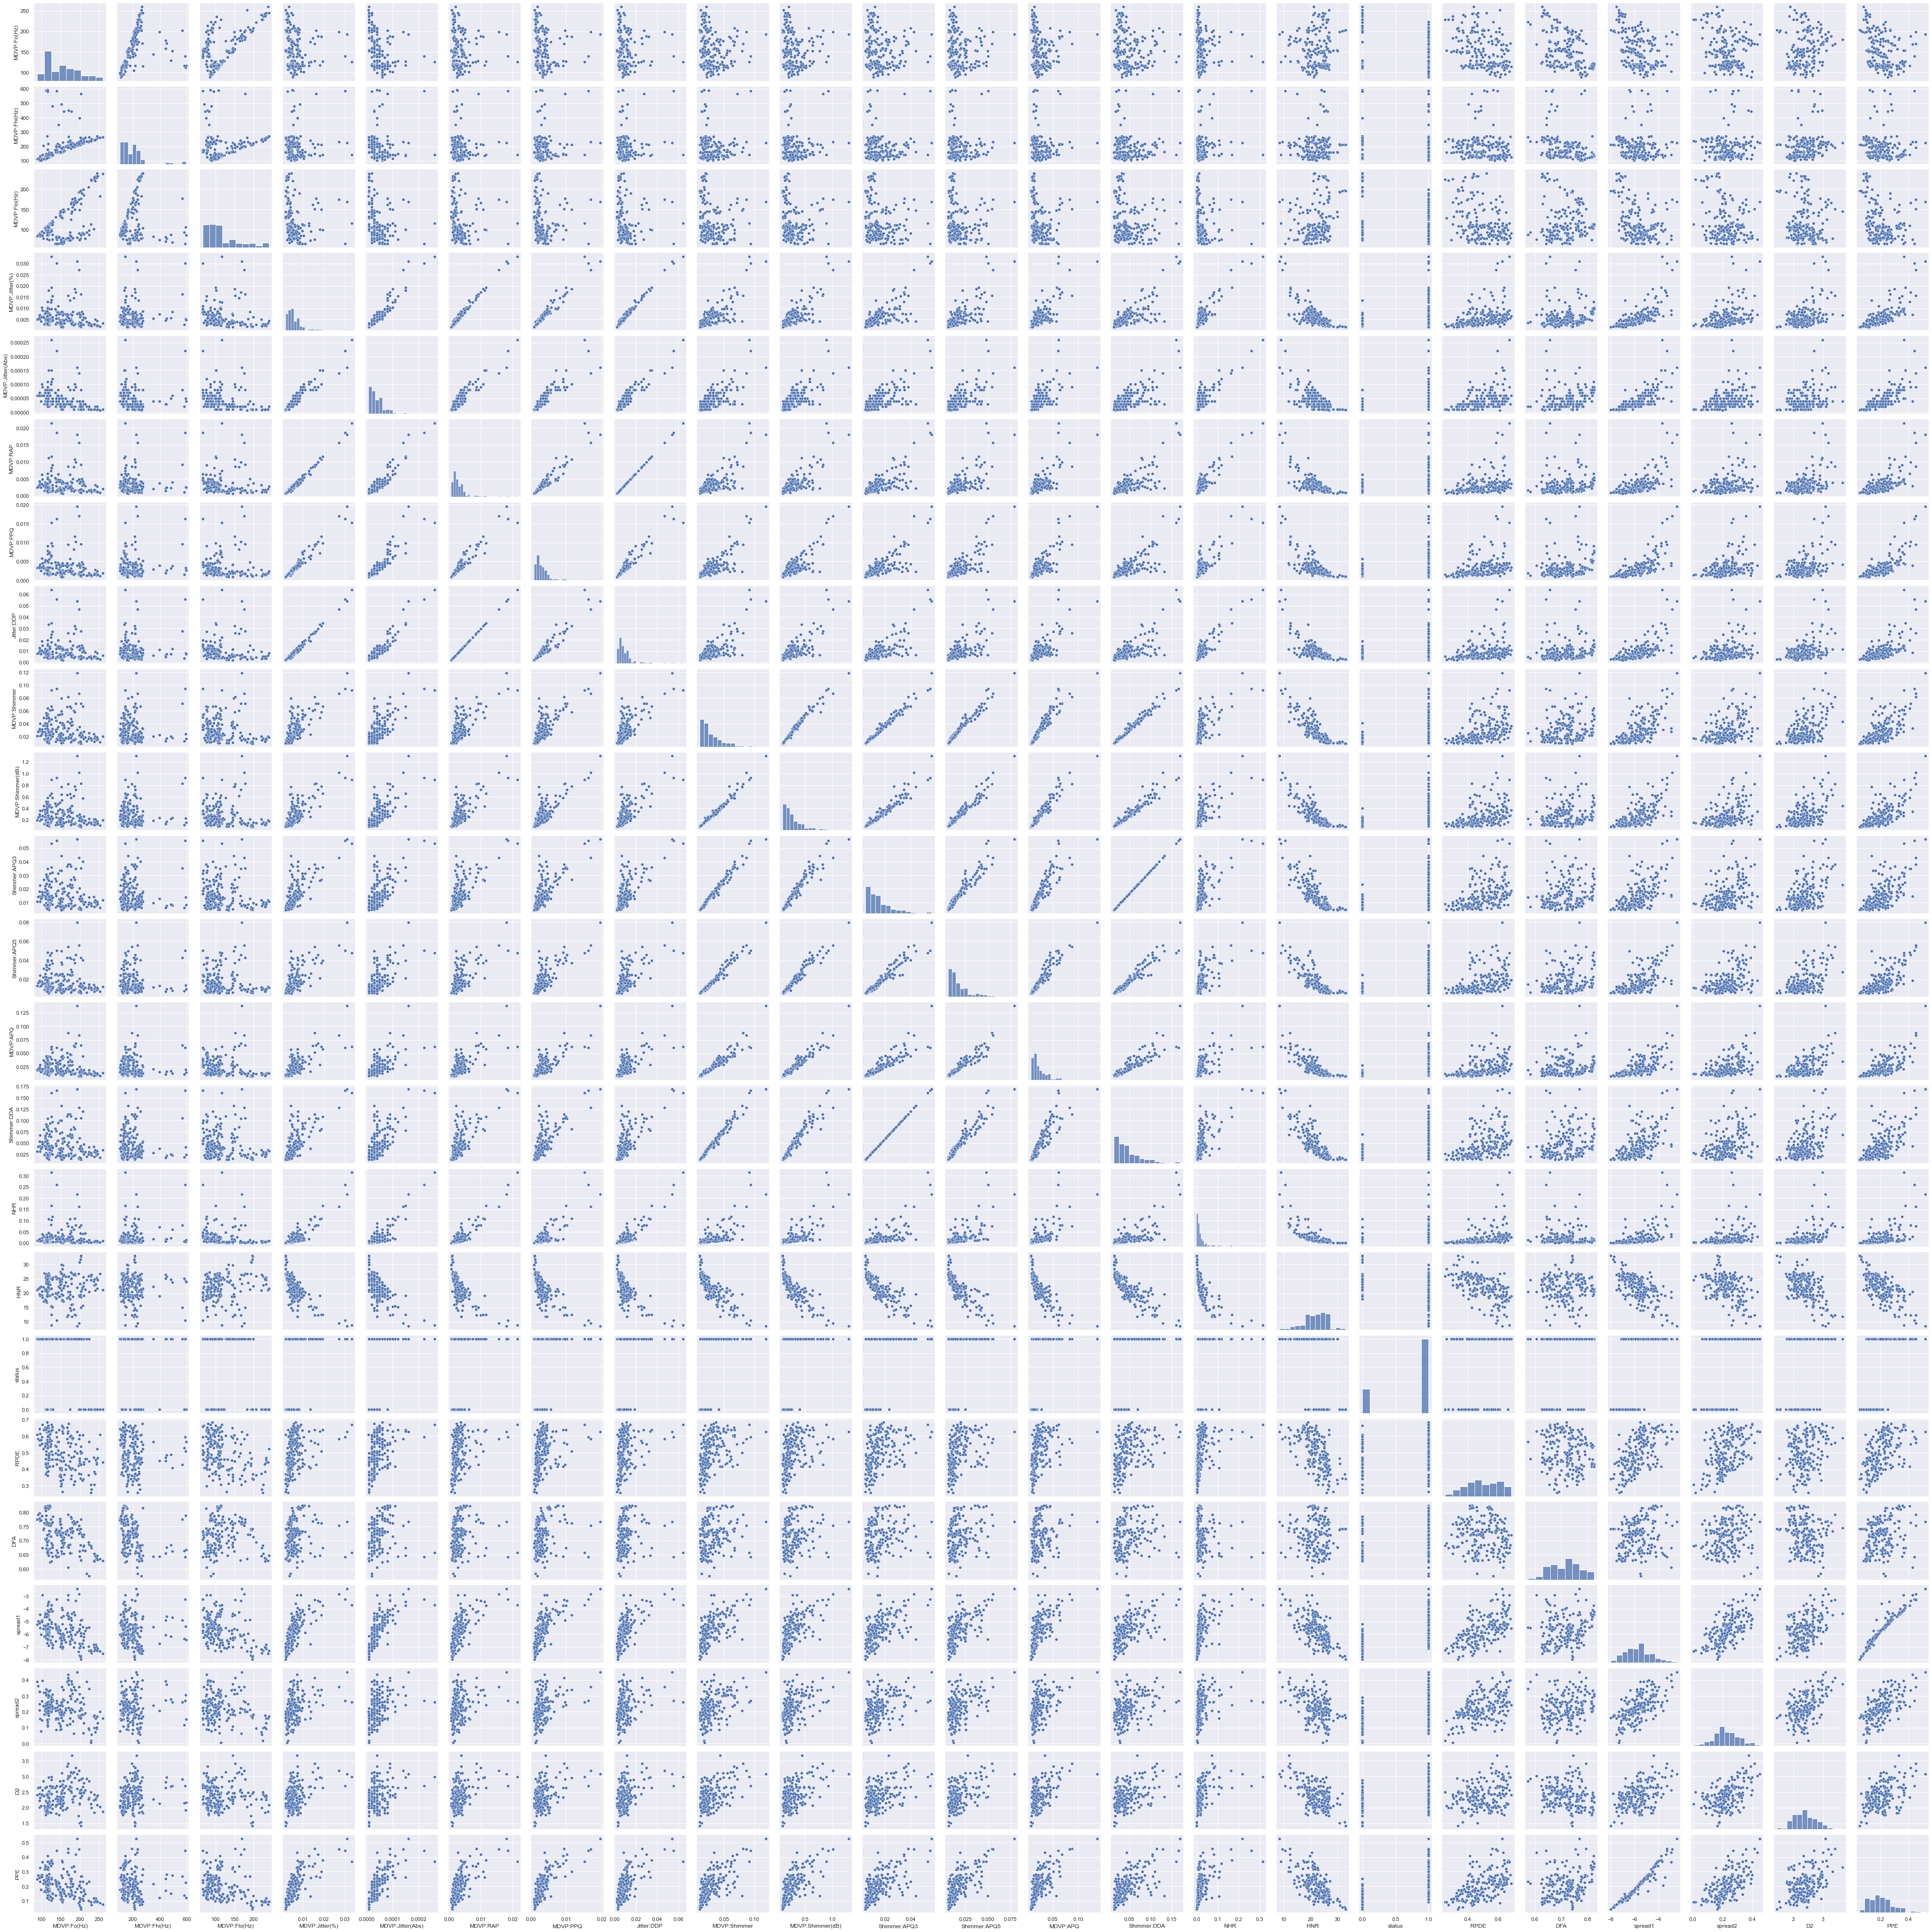

In [32]:
#A Scatter plot gives us an idea of the association between two variables
sns.pairplot(data);

In [33]:
# Check the correlation between each attribute
data.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
MDVP:Fo(Hz)          -0.098374         -0.073742     -0.094717     -0.070682   
MDVP:Fhi(Hz)          0.002281          0.043465     -0.003743     -0.009997   
MDVP:Flo(Hz)         -0.144543         -0.119089     -0.150747     -0.101095   
MDVP:Jitter(%)        0.769063          0.804289      0.746625      0.725561   
MDVP:Jitter(Abs)      0.703322          0.716601      0.697153      0.648961   
MDVP:RAP

#### Observation: 
<ol>
<li><span style="color:#228B22"> MDVP:Jitter(%) is highly correlated with MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, NHR
<li><span style="color:#228B22"> MDVP:Jitter(Abs) is highly correlated with MDVP:Jitter(%), MDVP:RAP, Jitter:DDP
<li><span style="color:#228B22"> MDVP:RAP is highly correlated with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:PPQ, Jitter:DDP, NHR
<li><span style="color:#228B22"> MDVP:PPQ is highly correlated with MDVP:Jitter(%), MDVP:RAP, Jitter:DDP
<li><span style="color:#228B22"> Jitter:DDP is highly correlated with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, NHR
<li><span style="color:#228B22"> MDVP:Shimmer is highly correlated with MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA     
<li><span style="color:#228B22"> Shimmer:APQ3 is highly correlated with MDVP:Shimmer, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA
<li><span style="color:#228B22"> Shimmer:APQ5 is highly correlated with MDVP:Shimmer(dB), MDVP:Shimmer, MDVP:APQ, Shimmer:DDA, Shimmer:APQ3
<li><span style="color:#228B22"> MDVP:APQ is highly correlated with MDVP:Shimmer, MDVP:Shimmer(dB) and Shimmer:APQ5
<li><span style="color:#228B22"> Shimmer:DDA is highly correlated with MDVP:Shimmer,Shimmer:APQ3, MDVP:Shimmer(dB) and Shimmer:APQ5
<li><span style="color:#228B22"> NHR is highly correlated with MDVP:Jitter(%), MDVP:RAP, Jitter:DDP
<li><span style="color:#228B22"> spread1 is highly correlated with PPE

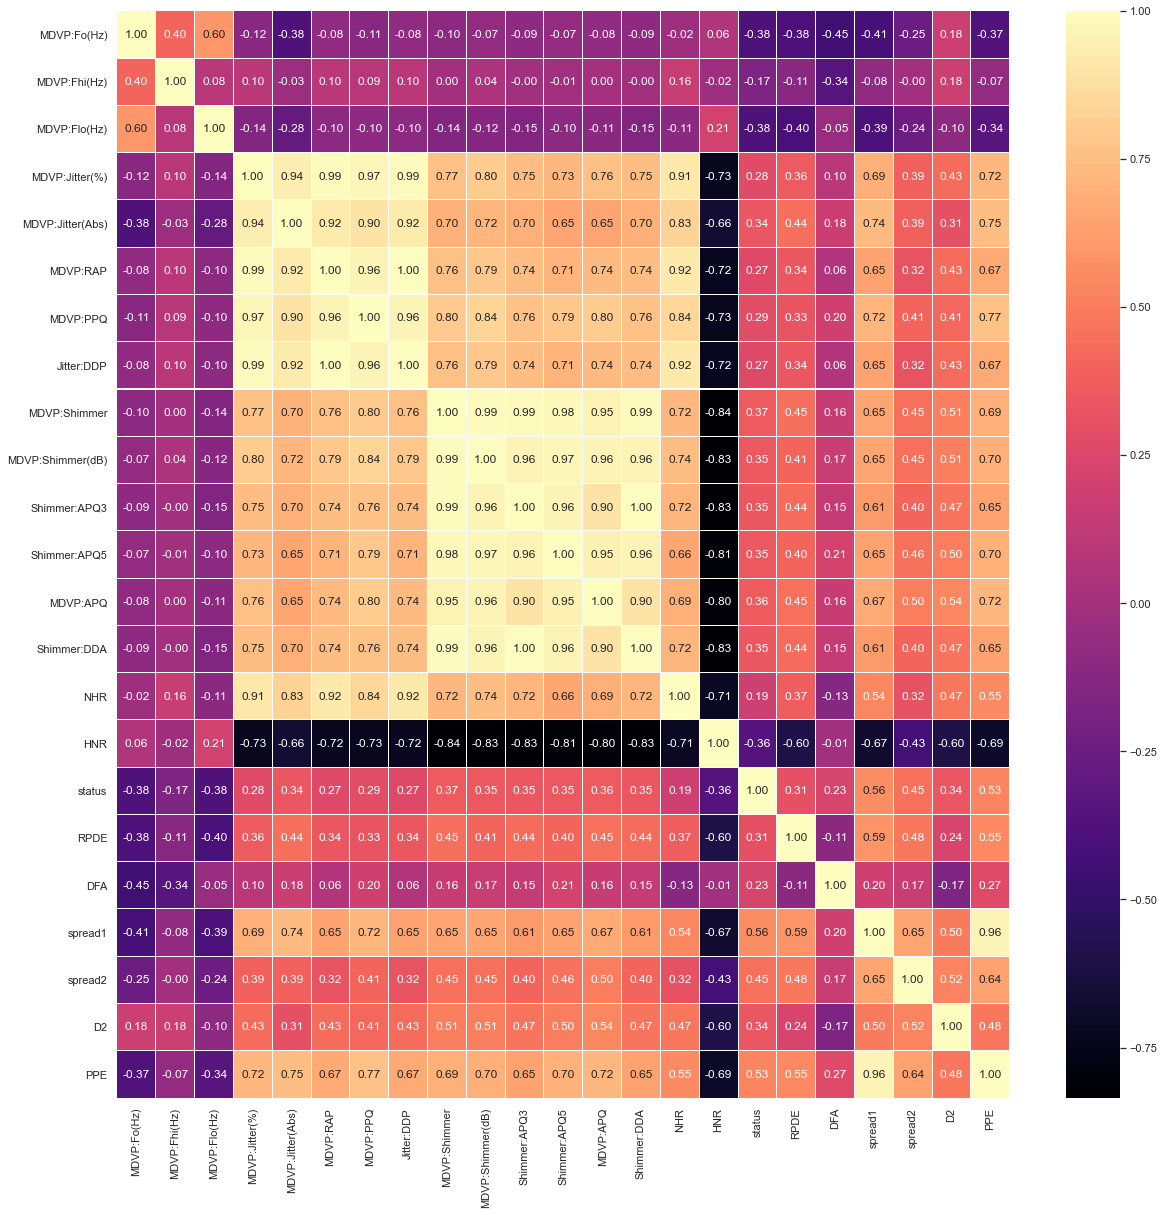

In [34]:
# Heat map for checking the correlation 
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

## <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 4. . Split the dataset into training and test set in the ratio of 70:30 (Training:Test) (5 points)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 4.1 Splitting the data

In [35]:
# Splitting data for logistic regression
X = data.drop(['name', 'status'], axis =1)
Y = data['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [36]:
# Checking the length of split data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [37]:
#Cheking the ratio of patients with disease and without disease
print("Original 'Status' True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['status'] == 1]), (len(data.loc[data['status'] == 1])/len(data.index)) * 100))
print("Original 'Status' False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['status'] == 0]), (len(data.loc[data['status'] == 0])/len(data.index)) * 100))
print("")
print("Training 'Status' True Values    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training 'Status' False Values   : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test 'Status' True Values        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test 'Status' False Values       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))
print("")

Original 'Status' True Values    : 147 (75.38%)
Original 'Status' False Values   : 48 (24.62%)

Training 'Status' True Values    : 107 (78.68%)
Training 'Status' False Values   : 29 (21.32%)

Test 'Status' True Values        : 40 (67.80%)
Test 'Status' False Values       : 19 (32.20%)



## <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc (5 points)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 5.1 Normalization and Scaling

In [38]:
#Scaled X values
X_scaled  = X.apply(zscore)   
# Splitting data with scaled values
sX_train, sX_test, sY_train, sY_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=1)

In [39]:
# Alterantely scales the data with sklearn StandardScaler. Essentially returns the z-scores of every attribute. (For comparison)
std_scale = StandardScaler()
X_scaled = std_scale.fit_transform(X)
nsX_train, nsX_test, nsY_train, nsY_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=1)

In [40]:
# Scales the data. MinMaxScaler normalizes the data using the formula (x - min)/(max - min)
minmax_scale = MinMaxScaler()
X_scaled = minmax_scale.fit_transform(X)
msX_train, msX_test, msY_train, msY_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=1)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 5.2 Removing missing values

In [41]:
# Check for missing values and dropping if any
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data # return the dataframe
missing_check(data)

Total  Percent
PPE                   0      0.0
D2                    0      0.0
MDVP:Fo(Hz)           0      0.0
MDVP:Fhi(Hz)          0      0.0
MDVP:Flo(Hz)          0      0.0
MDVP:Jitter(%)        0      0.0
MDVP:Jitter(Abs)      0      0.0
MDVP:RAP              0      0.0
MDVP:PPQ              0      0.0
Jitter:DDP            0      0.0
MDVP:Shimmer          0      0.0
MDVP:Shimmer(dB)      0      0.0
Shimmer:APQ3          0      0.0
Shimmer:APQ5          0      0.0
MDVP:APQ              0      0.0
Shimmer:DDA           0      0.0
NHR                   0      0.0
HNR                   0      0.0
status                0      0.0
RPDE                  0      0.0
DFA                   0      0.0
spread1               0      0.0
spread2               0      0.0
name                  0      0.0

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 5.2 Log transform to deal with skewness in the data

In [42]:
# Custom transformer to perform log transformation
numerical_vars = data.columns.drop('name').drop('status')
nl_data=data.copy()
log_transformer = FunctionTransformer(np.log1p)
nl_data[numerical_vars] = log_transformer.fit_transform(nl_data[numerical_vars])
nl_data.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1     4.795724      5.064505      4.330694        0.007809   
1  phon_R01_S01_2     4.815431      5.008299      4.743357        0.009633   
2  phon_R01_S01_3     4.767986      4.883642      4.723442        0.010445   
3  phon_R01_S01_4     4.767935      4.933545      4.721761        0.009921   
4  phon_R01_S01_5     4.762294      4.961312      4.715414        0.012758   
5  phon_R01_S01_6     4.800342      4.884028      4.743078        0.009633   
6  phon_R01_S02_1     4.797995      4.929020      4.752037        0.003324   
7  phon_R01_S02_2     4.685201      4.743540      4.656956        0.002896   
8  phon_R01_S02_3     4.571924      4.890860      4.529951        0.005495   
9  phon_R01_S02_4     4.564931      4.796641      4.524242        0.005306   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007  0.003693  0.005525    0.011029      0.042810   
1           0.00008  0.004639  0.006936    0.013844      0.059532   
2           0.00009  0.005425  0.007780    0.016198      0.051007   
3           0.00009  0.005007  0.006956    0.014938      0.053465   
4           0.00011  0.006529  0.009039    0.019469      0.062270   
5           0.00008  0.004619  0.007472    0.013785      0.045938   
6           0.00003  0.001549  0.002018    0.004649      0.015952   
7           0.00003  0.001439  0.001818    0.004301      0.015548   
8           0.00006  0.002926  0.003315    0.008762      0.020714   
9           0.00006  0.002676  0.003315    0.007998      0.027985   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0          0.354873      0.021585      0.030820  0.029277     0.063397   
1          0.486123      0.030859      0.044189  0.042753     0.089868   
2          0.393393      0.027197      0.037854  0.035271     0.079458   
3          0.416735      0.028821      0.039269  0.037026     0.084075   
4          0.459953      0.034305      0.047122  0.043682     0.099574   
5          0.375693      0.023013      0.034653  0.031915     0.067518   
6          0.131028      0.007760      0.009326  0.013420     0.023101   
7          0.125751      0.008256      0.009416  0.012482     0.024566   
8          0.174793      0.010673      0.012689  0.017024     0.031673   
9          0.227136      0.014307      0.017103  0.024146     0.042331   

        NHR       HNR  status      RPDE       DFA  spread1   spread2  \
0  0.021869  3.092541       1  0.346976  0.596242      NaN  0.236243   
1  0.019106  2.999973       1  0.377312  0.598573      NaN  0.289373   
2  0.013005  3.075052       1  0.357601  0.601738      NaN  0.270922   
3  0.013439  3.074728       1  0.361143  0.598416      NaN  0.288292   
4  0.017516  3.027667       1  0.348793  0.600749      NaN  0.210677   
5  0.012146  3.108078       1  0.347528  0.601618      NaN  0.261680   
6  0.006052  3.253702       1  0.467526  0.567647      NaN  0.229270   
7  0.003434  3.328340       1  0.493122  0.567166      NaN  0.168663   
8  0.010643  3.127287       1  0.479676  0.573004      NaN  0.283500   
9  0.010168  3.129476       1  0.436341  0.586932      NaN  0.282164   

         D2       PPE  
0  1.194359  0.250489  
1  1.249000  0.313842  
2  1.206647  0.287157  
3  1.225408  0.314062  
4  1.203627  0.343827  
5  1.159256  0.305847  
6  1.048997  0.192071  
7  1.119947  0.151652  
8  1.200721  0.208291  
9  1.233374  0.240089

## <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data (10 points)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 6.1 Logistic Regression

In [43]:
# Fit Logistic regression model on train
model_logistic = LogisticRegression(solver="liblinear")
model_logistic.fit(X_train, Y_train)
#Predict on test
Y_predict = model_logistic.predict(X_test)


coeff = pd.DataFrame(model_logistic.coef_)
coeff['intercept'] = model_logistic.intercept_
display(coeff)

0         1         2         3         4        5         6  \
0 -0.00854 -0.004358 -0.002338  0.008541  0.000071  0.00795  0.007116   

          7         8         9        10       11        12        13  \
0  0.023852  0.105716  1.021564  0.056202  0.06432  0.083963  0.168584   

         14        15        16        17        18        19        20  \
0  0.033325  0.070441  0.529799  0.737274  0.960551  0.419711  2.621596   

         21  intercept  
0  0.530123   0.722592

In [44]:
model_logistic.score(X_test, Y_test)

0.8135593220338984

In [45]:
#Check for overfitting
Y_predict_train = model_logistic.predict(X_train)
Y_predict_test = model_logistic.predict(X_test)

print("Logistic Regression Model Accuracy for training data: {0:.4f}".format(metrics.accuracy_score(Y_train, Y_predict_train)))
print("Logistic Regression Model Accuracy for testing data: {0:.4f}".format(metrics.accuracy_score(Y_test, Y_predict_test)))

Logistic Regression Model Accuracy for training data: 0.8897
Logistic Regression Model Accuracy for testing data: 0.8136


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 6.2 kNN

In [46]:
model_kNN = KNeighborsClassifier(n_neighbors=6  , weights = 'distance' )

# Fit kNN model on train
model_kNN.fit(sX_train, sY_train)
#Predict on test
sY_predict = model_kNN.predict(sX_test)

In [47]:
model_kNN.score(sX_test, sY_test)

0.864406779661017

In [48]:
#Check for overfitting
sY_predict_train = model_kNN.predict(sX_train)
sY_predict_test = model_kNN.predict(sX_test)

print("kNN Model Accuracy for training data: {0:.4f}".format(metrics.accuracy_score(sY_train, sY_predict_train)))
print("kNN Model Accuracy for testing data: {0:.4f}".format(metrics.accuracy_score(sY_test, sY_predict_test)))

kNN Model Accuracy for training data: 1.0000
kNN Model Accuracy for testing data: 0.8644


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 6.3 Naive Bayes

In [49]:
# Fit NB model on train
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)

Y_predict = model_NB.predict(X_test)

In [50]:
model_NB.score(X_test, Y_test)

0.711864406779661

In [51]:
#Check for overfitting
Y_predict_train = model_NB.predict(X_train)
Y_predict_test = model_NB.predict(X_test)

print("Naive Bayes Model Accuracy for training data: {0:.4f}".format(metrics.accuracy_score(Y_train, Y_predict_train)))
print("Naive Bayes Model Accuracy for testing data: {0:.4f}".format(metrics.accuracy_score(Y_test, Y_predict_test)))

Naive Bayes Model Accuracy for training data: 0.7059
Naive Bayes Model Accuracy for testing data: 0.7119


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 6.4 SVM

In [52]:
# Fit SVM model on train
clf = SVC(gamma=0.025, C=3)
clf.fit(X_train , Y_train)

Y_pred = clf.predict(X_test)

## <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 7. Train a meta-classifier and note the accuracy on test data (10 points) 

In [53]:
# Initializing Logistic Regression classifier
classifier1 = LogisticRegression(solver="liblinear")

# Initializing KNN Classifier
classifier2 = KNeighborsClassifier(n_neighbors=6  , weights = 'distance' )

# Initializing Naive Bayes classifier
classifier3 = GaussianNB()

# Initializing Support Vector classifier
classifier4 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

In [54]:
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))

In [55]:
# Create list to store classifiers
classifiers = {"SVC": classifier1,
               "MLP": classifier2,
               "NuSVC": classifier3,
               "RF": classifier4,
               "Stack": sclf}

In [56]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, Y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [57]:
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    Y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = Y_pred

# Add the test set to the results object
results["Target"] = Y_test

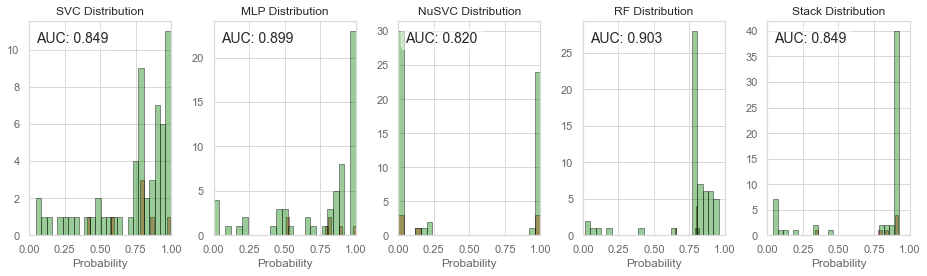

In [58]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    Y_pred = results[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(Y_test, Y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()
plt.show()

In [59]:
# Define parameter grid 
params = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}


# Initialize GridSearchCV
grid = GridSearchCV(estimator = sclf, 
                    param_grid = params, 
                    cv = 5,
                    scoring = "roc_auc",
                    verbose = 10,
                    n_jobs = -1);

# Fit GridSearchCV
grid.fit(X_train, Y_train);

# Making prediction on test set
Y_pred = grid.predict_proba(X_test)[:,1];

# Getting AUC
auc = metrics.roc_auc_score(Y_test, Y_pred);

# Print results
print(f"The AUC of the tuned Stacking classifier is {auc:.3f}");

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.2s finished


The AUC of the tuned Stacking classifier is 0.907


## <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy (10 points)

In [61]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, Y_train)
print(dTree.score(X_train, Y_train))
print(dTree.score(X_test, Y_test))

1.0
0.847457627118644


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 8.1 Bagging Classifier

In [62]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, Y_train)

Y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , Y_test))

0.8305084745762712


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 8.2 Adaboost Classifier

In [63]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, Y_train)
Y_predict = abcl.predict(X_test)
print(abcl.score(X_test , Y_test))

0.8305084745762712


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 8.3 Gradientboost Classifier

In [64]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, Y_train)
Y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, Y_test))

0.8813559322033898


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 8.4 Random Forest Classifier

In [65]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, Y_train)
Y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, Y_test))

0.847457627118644


## <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 9. Compare all the models (minimum 5) and pick the best one among them (10 points)

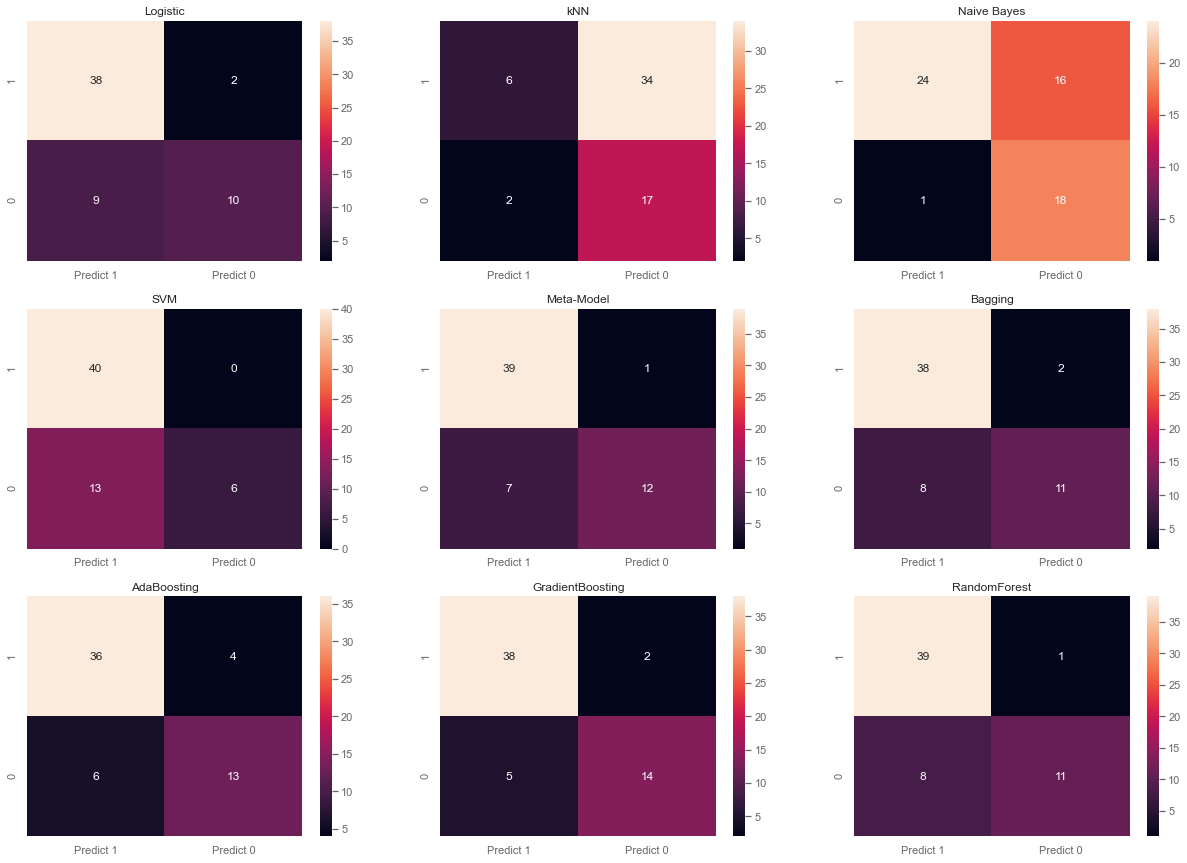

In [66]:
# Confusion matrix for different models
fig, axs = plt.subplots(3,3, figsize=(21,15))
axs=axs.flatten()
models=[model_logistic, model_kNN, model_NB, clf, sclf, bgcl, abcl, gbcl, rfcl]
model_names = ['Logistic', 'kNN', 'Naive Bayes', 'SVM', 'Meta-Model', 'Bagging', 'AdaBoosting', 'GradientBoosting', 'RandomForest']
for i in range(9):
    Y_predict = models[i].predict(X_test)
    cm = metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
    axs[i].set_title(model_names[i])
    sns.heatmap(df_cm, annot=True, fmt='g', ax=axs[i]);

#### Observation:  <span style="color:#228B22"> Since False negatives should be considered as fatal in case of disease dectection, Meta-model and Random Forest can be considered as overall best models. SVM also gives good results

In [70]:
clf = SVC(gamma=0.025, C=3, probability=True)
models=[model_logistic, model_kNN, model_NB, clf, sclf, bgcl, abcl, gbcl, rfcl]
probas=[]
for i in range(9):
    probas.append(models[i].fit(X_train, Y_train).predict_proba(X_test))
    fpr, tpr, thresholds = roc_curve(Y_test, probas[i][:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve for {} model: \t {}".format(model_names[i], roc_auc))

Area under the ROC curve for Logistic model: 	 0.8486842105263158
Area under the ROC curve for kNN model: 	 0.8986842105263158
Area under the ROC curve for Naive Bayes model: 	 0.8203947368421053
Area under the ROC curve for SVM model: 	 0.8776315789473684
Area under the ROC curve for Meta-Model model: 	 0.8763157894736843
Area under the ROC curve for Bagging model: 	 0.9217105263157895
Area under the ROC curve for AdaBoosting model: 	 0.8789473684210526
Area under the ROC curve for GradientBoosting model: 	 0.9394736842105263
Area under the ROC curve for RandomForest model: 	 0.950657894736842


<Figure size 432x288 with 0 Axes>

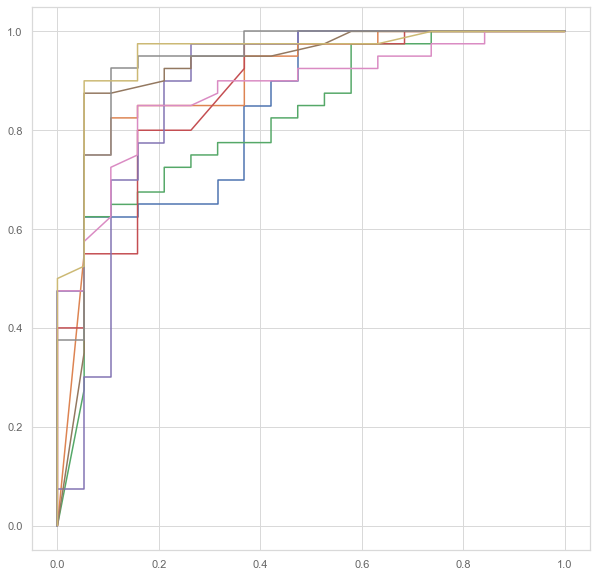

In [71]:
plt.clf()
plt.figure(figsize=(10, 10));
for i in range(9):
    probas.append(models[i].fit(X_train, Y_train).predict_proba(X_test))
    fpr, tpr, thresholds = roc_curve(Y_test, probas[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (area = {})'.format(model_names[i], roc_auc));
plt.show();

#### Observation:  <span style="color:#228B22"> Based on area under the ROC curve, the Random Forest and Gradient Boost ensemble models gives best predictions

#### Observation:  <span style="color:#228B22"> Overall Random Forest is giving the best performance

In [72]:
# Checking other matrices
models=[model_logistic, model_kNN, model_NB, clf, sclf, bgcl, abcl, gbcl, rfcl]
model_names = ['Logistic', 'kNN', 'Naive Bayes', 'SVM', 'Meta-Model', 'Bagging', 'AdaBoosting', 'GradientBoosting', 'RandomForest']
for i in range(9):
    Y_predict = models[i].predict(X_test)
    print('Metrics for {}'.format(model_names[i]))
    print(metrics.classification_report(Y_test, Y_predict, labels=[1, 0]))

Metrics for Logistic
              precision    recall  f1-score   support

           1       0.81      0.95      0.87        40
           0       0.83      0.53      0.65        19

    accuracy                           0.81        59
   macro avg       0.82      0.74      0.76        59
weighted avg       0.82      0.81      0.80        59

Metrics for kNN
              precision    recall  f1-score   support

           1       0.83      0.95      0.88        40
           0       0.85      0.58      0.69        19

    accuracy                           0.83        59
   macro avg       0.84      0.76      0.79        59
weighted avg       0.83      0.83      0.82        59

Metrics for Naive Bayes
              precision    recall  f1-score   support

           1       0.96      0.60      0.74        40
           0       0.53      0.95      0.68        19

    accuracy                           0.71        59
   macro avg       0.74      0.77      0.71        59
weighted avg 

In [73]:
#Function to calculate custom matrices
def disp_metrics(tp, fn, fp, tn):
    # Classification error rate (CER)
    CER = (fp+fn)/(tp+tn+fp+fn)
    #Sensitivity (TPR)
    TPR = tp/(tp+fn)
    #Specificity (TNR)
    TNR = tn/(tn+fp)
    return pd.Series([CER, TPR, TNR], index=['CER', 'TPR', 'TNR'])

In [77]:
print("Error-rate, sensitivity and specificity")
models=[model_logistic, model_kNN, model_NB, clf, sclf, bgcl, abcl, gbcl, rfcl]
model_names = ['Logistic', 'kNN', 'Naive Bayes', 'SVM', 'Meta-Model', 'Bagging', 'AdaBoosting', 'GradientBoosting', 'RandomForest']
m=[];
for i in range(9):
    Y_predict = models[i].predict(X_test)
    cm=metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])
    tp, fn, fp, tn = cm.ravel()
    m.append(disp_metrics(tp, fn, fp, tn))
pd.DataFrame(m, index=model_names)

Error-rate, sensitivity and specificity


CER    TPR       TNR
Logistic          0.186441  0.950  0.526316
kNN               0.169492  0.950  0.578947
Naive Bayes       0.288136  0.600  0.947368
SVM               0.220339  1.000  0.315789
Meta-Model        0.152542  0.975  0.578947
Bagging           0.169492  0.950  0.578947
AdaBoosting       0.169492  0.900  0.684211
GradientBoosting  0.118644  0.950  0.736842
RandomForest      0.152542  0.975  0.578947

Additional work that needs to be done in this notebook 
* Hyperparameter tuning to imporve models
* Dropping strongly correlated attributes
* Working with skewness of data, applying log transform to selected attributes
* Working with outlier removed (encoded) data
* Cross validation of each model with different random seed to split test train data
* Fill in the missing observations from the Supervised learning project
* Trying to apply different scale transforms to kNN
* See the difference in accuracy for scaled data with models other than kNN
* Working with ROC threshold
* working with meta classifier 